In [1]:
import numpy as np
import pandas as pd

from scipy import stats 
import scipy as spy

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

# Домашнее задание по курсу анализа данных
Версия от 11.12.2021

Всего 50 баллов = 40 основных + 10 дополнительных

**Оценка**  = (Количество баллов за работу*2 + 20)/10

**Мягкий дедлайн: 18.12.2021  23:59**

**Жесткий дедлайн: 20.12.2021  8:59**

Присылать решение ссылкой на ваш **github** в телеграмм **@Aleron75** или на почту **milenkin.aa@phystech.edu**

**Автор:** Миленькин Александр

In [2]:
data_path = "https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/people_data_clustering.csv"
data = pd.read_csv(data_path, index_col=0)
print("Размеры датасета", data.shape)
data.head()

Размеры датасета (6000, 9)


was_married  children        salary  ...     home_cost  drive_info happyness
id                                       ...                                    
0             1       4.0  4.420530e+07  ...  1.003674e+07         NaN  0.727499
1             1       2.0  1.737490e+08  ...  1.014051e+07         0.0  0.383234
2             1       6.0  2.489055e+08  ...  1.043318e+07         NaN  0.432142
3             0       1.0  1.268718e+08  ...  1.004299e+07         NaN  0.377987
4             1       9.0  8.596042e+07  ...  1.021908e+07         NaN  0.657579

[5 rows x 9 columns]

<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `children` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол (0 - женщина, 1 - мужчина)
* `age` - Возраст
* `home_cost` - Сумарная стоимость жилья/недвижимости
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
* `happyness` - уровень счастья по результатам опроса
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет и, используя класстерный анализ, разбить пользователей на сегменты. Сделать выводы о причинах такой кластеризации.

# Чистка датасета (5 баллов)
* Есть ли дубли в данных? Если есть удалить.
* Найти и удалить выбросы по признаку `home_cost`. (Их не больше 15-х, не меньше 3-х)

In [4]:
data.loc[data.duplicated(subset=['was_married', 'salary', 'sex', 'age', 'profession', 'home_cost', 'drive_info', 'happyness'])]

Empty DataFrame
Columns: [was_married, children, salary, sex, age, profession, home_cost, drive_info, happyness]
Index: []

Дублей в данных нет, так что ничего не удаляем.

Посмотрим на выбросы по признаку home_cost с помощью boxplot

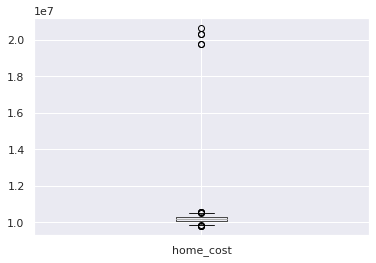

In [5]:
numeric_col = ['home_cost']
data.boxplot(numeric_col)

In [6]:
#Найдем выбросы и удалим из датафрейма

low_kv = data['home_cost'] > 1.1e7
high_kv = data['home_cost'] < 0.985e7

In [7]:
data = data.drop(data[low_kv | high_kv].index, axis=0)

In [8]:
data

was_married  children        salary  ...     home_cost  drive_info happyness
id                                        ...                                    
0              1       4.0  4.420530e+07  ...  1.003674e+07         NaN  0.727499
1              1       2.0  1.737490e+08  ...  1.014051e+07         0.0  0.383234
2              1       6.0  2.489055e+08  ...  1.043318e+07         NaN  0.432142
3              0       1.0  1.268718e+08  ...  1.004299e+07         NaN  0.377987
4              1       9.0  8.596042e+07  ...  1.021908e+07         NaN  0.657579
..           ...       ...           ...  ...           ...         ...       ...
495            1       0.0  3.589436e+07  ...  1.007038e+07         1.0  0.599222
496            1       3.0  2.454208e+06  ...  1.009348e+07         1.0  0.259710
497            1       0.0  3.335405e+06  ...  1.016696e+07         0.0  0.258779
498            0       1.0  2.024255e+08  ...  1.025544e+07         NaN  0.212931
499            1       3.0  2.274622e+06  ...  1.027476e+07         NaN  0.553919

[5990 rows x 9 columns]

Выбросов было 10 штук

# Проверка гипотез (15 баллов)

<div class="alert alert-info">

<b>Описание заданий раздела:</b>    
    
В этом разделел вам предстоит:
* Проверить предложенные утверждения визуально.
* Применить подходящий статистический критерий, чтобы окончательно доказать или опровергнуть гипотезы на снове этих данных.

<div class="alert alert-warning">
    
* Правда ли женщины в среднем имеют более высокую зарплату, чем мужчины?

Проверим предложенное утверждение визуально

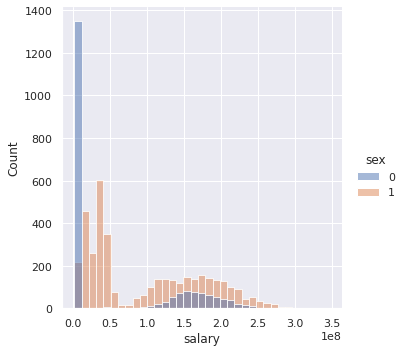

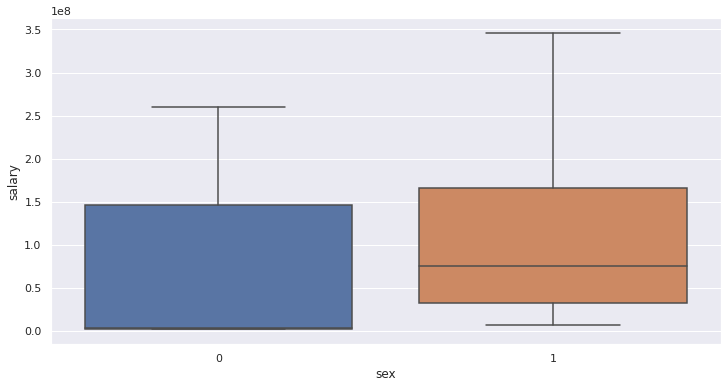

In [11]:
sub_data = data[(data['sex']==0)|(data['sex']==1)]
data.reset_index(inplace=True)
sns.displot(sub_data, x='salary', hue ='sex', bins=35)

plt.figure(figsize=(12, 6))
sns.boxplot(data=sub_data, x="sex", y="salary");

Видно, что мужчины имеют более высокую зарплату.

Воспользуемся T-test для доказательства или опровержения гипотезы на основе этих данных.

(Такой тест показывает, имеют ли две выборки данных разные средние значения. Здесь мы принимаем нулевую гипотезу о том, что обе группы имеют равные средние.)


In [12]:
Female_salary = data[data['sex']==0]['salary']
Male_salary = data[data['sex']==1]['salary']

t, p_value  = stats.ttest_ind(Female_salary, Male_salary)
alpha = 0.05

if p_value < alpha:
    print('p_value равно', p_value, ' -> выборки отличаются!')
else:
    print('p_value равно', p_value, ' -> выборки похожи!')

p_value равно 6.564277825895849e-79  -> выборки отличаются!


Получили значение p_value, близкое к 0.0, следовательно, отклоняем нулевую гипотезу, то есть - средние значения двух распределений различны и это различие статистически значимо.

<div class="alert alert-warning">
    
* Правда ли, что инженеры (Engineer) зарабатывают в среднем больше, чем люди из сферы развлечений (Entertainment)?

Проверим предложенное утверждение визуально

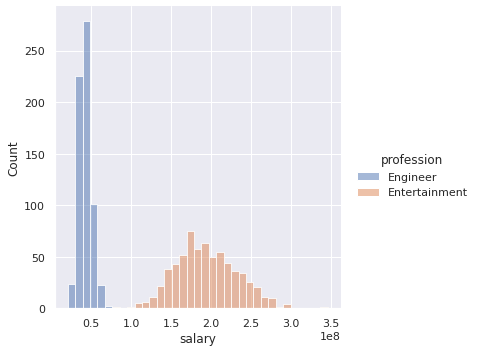

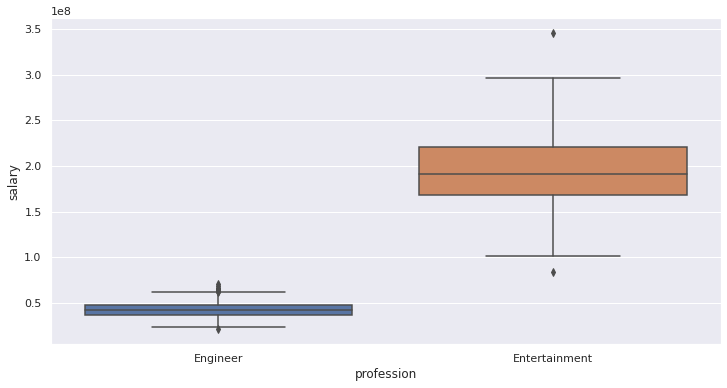

In [14]:
sub_data = data[(data['profession']=='Engineer')|(data['profession']=='Entertainment')]
sns.displot(sub_data, x='salary', hue ='profession', bins=35)

plt.figure(figsize=(12, 6))
sns.boxplot(data=sub_data, x="profession", y="salary");

Из графиков видно, что люди из сферы развлечений (Entertainment) зарабатывают все-таки больше, чем инженеры (Engineer).

Воспользуемся T-test для доказательства или опровержения гипотезы на основе этих данных.


In [15]:
Engineer_salary = data[data['profession']=='Engineer']['salary']
Entertainment_salary = data[data['profession']=='Entertainment']['salary']

t, p_value  = stats.ttest_ind(Engineer_salary, Entertainment_salary)
alpha = 0.05

if p_value < alpha:
    print('p_value равно', p_value, ' -> выборки отличаются!')
else:
    print('p_value равно', p_value, ' -> выборки похожи!')

p_value равно 0.0  -> выборки отличаются!


Средние значения двух распределений различны

<div class="alert alert-warning">
    
* Правда ли, что те, у кого больше трех детей зарабатывают в среднем больше, чем те, у кого меньше или трое детей?

Посмотрим на выборки визуально

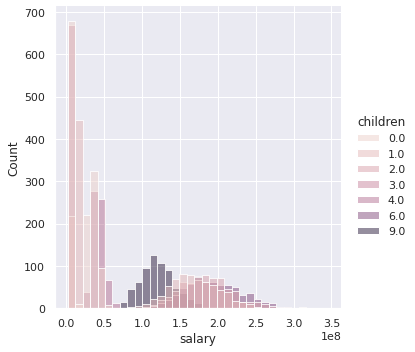

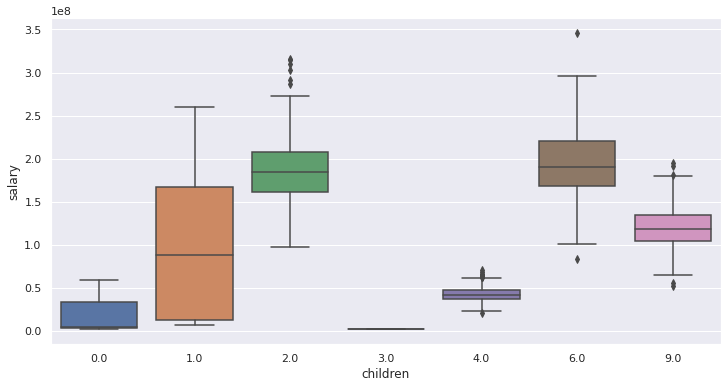

In [16]:
sub_data = data[(data['children'] > 3.0)|(data['children'] <= 3.0)]
sns.displot(sub_data, x='salary', hue ='children', bins=35)

plt.figure(figsize=(12, 6))
sns.boxplot(data=sub_data, x="children", y="salary");

Используем T-test

In [17]:
Children_more3 = data[data["children"] > 3.0]["salary"]
Children_lesseq3 = data[data["children"] <= 3.0]["salary"]

t, p_value  = stats.ttest_ind(Children_more3, Children_lesseq3)
alpha = 0.05

if p_value < alpha:
    print('p_value равно', p_value, ' -> выборки отличаются!')
else:
    print('p_value равно', p_value, ' -> выборки похожи!')

p_value равно 9.144643892280899e-128  -> выборки отличаются!


<div class="alert alert-warning">
    
* Правда ли, что дома художники (Artist) живут в домах, которые в среднем дороже или дешевле, чем дома адвокатов (Lawyer)?

Посмотрим на выборки визуально

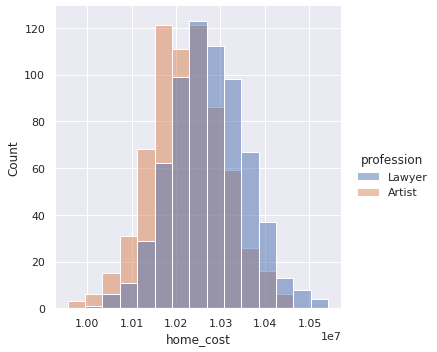

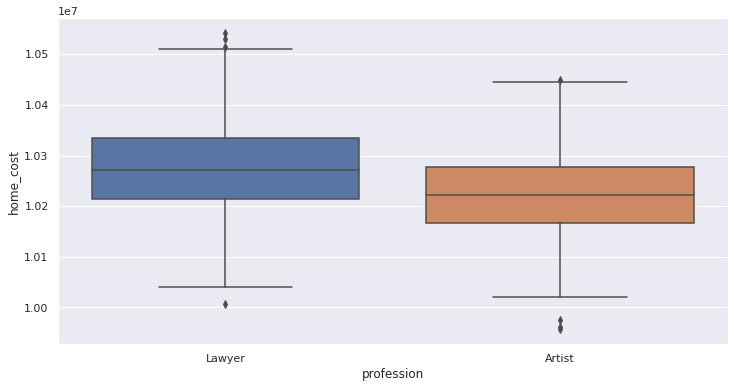

In [18]:
sub_data = data[(data['profession']=='Artist')|(data['profession']=='Lawyer')]
sns.displot(sub_data, x="home_cost", hue="profession", bins=15)

plt.figure(figsize=(12, 6))
sns.boxplot(data=sub_data, x="profession", y="home_cost");

В целом видно различие, дома адвокатов дороже домов художников.

Так как распределения нормальные, то воспользуемся Критерием Стьюдента.

In [19]:
Artist = data[data["profession"] == 'Artist']["home_cost"]
Lawyer = data[data["profession"] == 'Lawyer']["home_cost"]

t, p_value  = stats.ttest_ind(Artist, Lawyer)
alpha = 0.05

if p_value < alpha:
    print('p_value равно', p_value, ' -> выборки отличаются!')
else:
    print('p_value равно', p_value, ' -> выборки похожи!')

p_value равно 1.6456526985204343e-24  -> выборки отличаются!


Снова видим p-value, близкое к нулю, которое говорит о том, что средние значения двух распределений различны и это различие статистически значимо.

<div class="alert alert-warning">
    
* Прада ли, что недвижимость у бывавших в браке в среднем дороже, чем у не бывавших в браке?

Проверим предложенное утверждение визуально

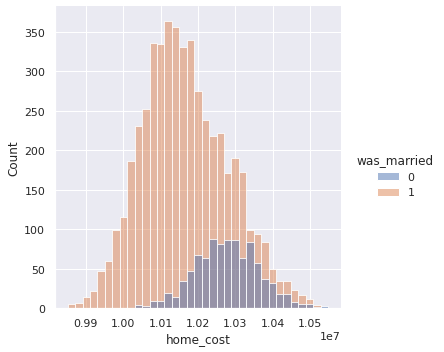

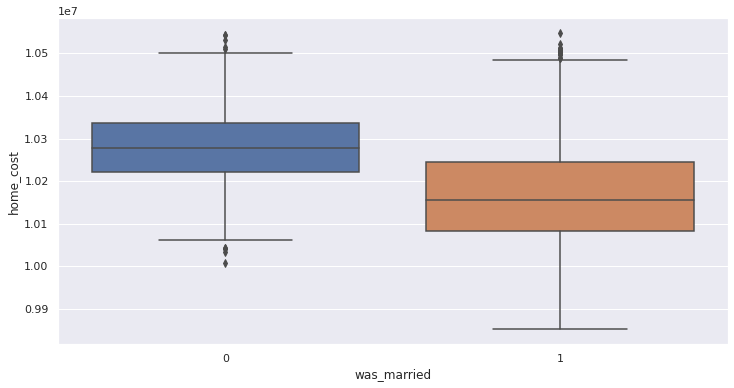

In [20]:
sub_data = data[(data['was_married']==0)|(data['was_married']==1)]
sns.displot(sub_data, x='home_cost', hue ='was_married', bins=35)

plt.figure(figsize=(12, 6))
sns.boxplot(data=sub_data, x="was_married", y="home_cost");

В целом видно, что те, кто не был в браке имеют более дорогое жилье.

Так как распределения нормальные, воспользуемся снова критерием Стьюдента.

In [21]:
Was_married = data[data["was_married"] == 1]["home_cost"]
Was_not_married = data[data["was_married"] == 0]["home_cost"]

t, p_value  = stats.ttest_ind(Was_married, Was_not_married)
alpha = 0.05

if p_value < alpha:
    print('p_value равно', p_value, ' -> выборки отличаются!')
else:
    print('p_value равно', p_value, ' -> выборки похожи!')

p_value равно 1.8256761827472564e-163  -> выборки отличаются!


Низкое значение p-value говорит о различиях в распределениях.

<div class="alert alert-warning">
    
* Прада ли, что мужчины в среднем чаще бывают в браке, чем женщины?

**Подсказка** - воспользуйтесь критерием хи-квадрат из библиотеки scipy

<Figure size 864x432 with 0 Axes>

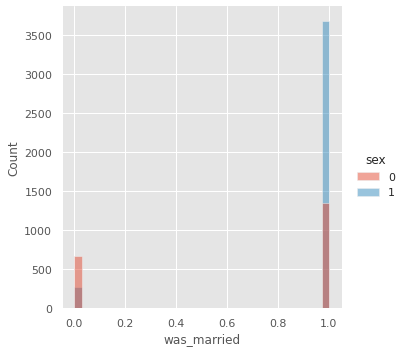

<Figure size 864x432 with 0 Axes>

In [56]:
sub_data = data[(data['sex']==0)|(data['sex']==1)]
sns.displot(sub_data, x='was_married', hue ='sex', bins=35)

plt.figure(figsize=(12, 6))

Видно, что выборки различаются

Воспользуемся критерием хи-квадрат для доказательства или опровержения гипотезы

In [68]:
from scipy.stats import chi2_contingency

Men = data[data["sex"] == 1]["was_married"]
Women = data[data["sex"] == 0]["was_married"]

# df = pd.DataFrame({'sex': data["sex"], 'was_married': data["was_married"]})
x = pd.crosstab(data['sex'], data['was_married'])

_, p_value, _, _ = spy.stats.chi2_contingency(x)
alpha = 0.05

if p_value < alpha:
    print('p_value равно', p_value, ' -> выборки отличаются!')
else:
    print('p_value равно', p_value, ' -> выборки похожи!')

p_value равно 1.5239523187486126e-150  -> выборки отличаются!


Получили низкое p-value, выборки различны

# Гипотезы при множественном тестировании (10 баллов)

In [30]:
# Подсказка: 
# - дисперсионнай анализ  f_oneway()
# - Крускал Уоллиса

<div class="alert alert-warning">
    
* Правда ли между представителями таких профессий как, **Homemaker**, **Marketing**, **Healthcare** и **Executive** в среднем  зарплаты не отличаются между собой? Ответ подкрепите визуализацией и подходящим статистическим критерием. 

Проверим предложенное утверждение визуально

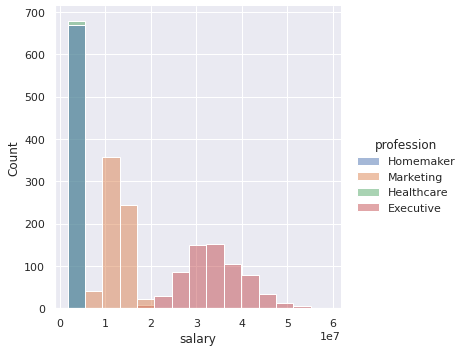

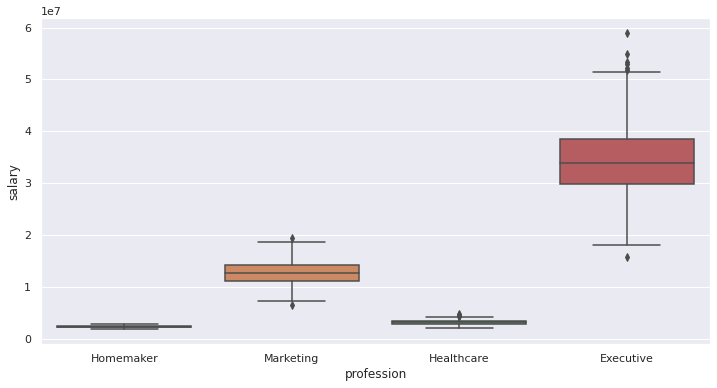

In [31]:
sub_data = data[(data['profession']=='Homemaker')|(data['profession']=='Marketing')|(data['profession']=='Healthcare')|(data['profession']=='Executive')]
sns.displot(sub_data, x="salary", hue="profession", bins=15)

plt.figure(figsize=(12, 6))
sns.boxplot(data=sub_data, x="profession", y="salary");

Из графиков видно, что зарплаты довольно сильно различаются между собой у различных профессий, так что гипотеза неверна, попробуем это доказать

Используем статистический критерий - дисперсионнай анализ f_oneway()

In [32]:
Homemaker = data[data["profession"] == 'Homemaker']["salary"]
Marketing = data[data["profession"] == 'Marketing']["salary"]
Healthcare = data[data["profession"] == 'Healthcare']["salary"]
Executive = data[data["profession"] == 'Executive']["salary"]

fvalue, pvalue = stats.f_oneway(Homemaker, Marketing, Healthcare, Executive)  

alpha = 0.05
if pvalue < alpha:
    print('pvalue равно', pvalue)
    print('Группы статистически значимо отличаются')
else:
    print('pvalue равно', pvalue)
    print('Группы статистически похожи')

pvalue равно 0.0
Группы статистически значимо отличаются


Наша гипотеза подтвердилась

<div class="alert alert-warning">
    
* Правда ли между представителями таких профессий как, **Doctor**, **Entertainment** и **Lawyer** в среднем  зарплаты не отличаются между собой? Ответ подкрепите визуализацией и подходящим статистическим критерием. 

Проверим предложенное утверждение визуально

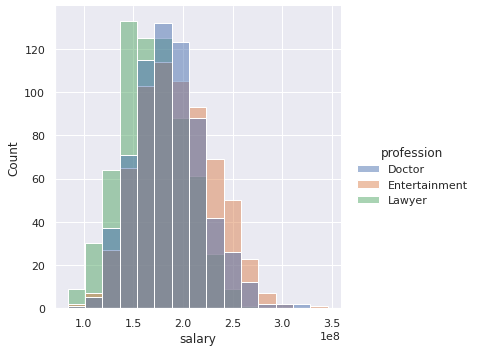

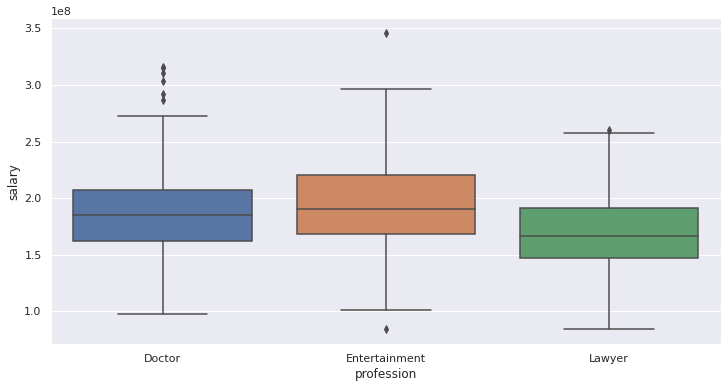

In [33]:
sub_data = data[(data['profession']=='Doctor')|(data['profession']=='Entertainment')|(data['profession']=='Lawyer')]
sns.displot(sub_data, x="salary", hue="profession", bins=15)

plt.figure(figsize=(12, 6))
sns.boxplot(data=sub_data, x="profession", y="salary");

В принципе зарплаты в данном случае тоже отличаются, но не на такую большую величину, что в прошлом примере, проверим критерий f_oneway()

In [34]:
Doctor = data[data["profession"] == 'Doctor']["salary"]
Entertainment = data[data["profession"] == 'Entertainment']["salary"]
Lawyer = data[data["profession"] == 'Lawyer']["salary"]

fvalue, pvalue = stats.f_oneway(Doctor, Entertainment, Lawyer)

alpha = 0.05
if pvalue < alpha:
    print('pvalue равно', pvalue)
    print('Группы статистически значимо отличаются')
else:
    print('pvalue равно', pvalue)
    print('Группы статистически похожи')

pvalue равно 5.67666591800931e-38
Группы статистически значимо отличаются


Попробуем также использовать критерий Крускала Уоллиса

In [35]:
statistic, pvalue = stats.kruskal(Doctor, Entertainment, Lawyer)

alpha = 0.05
if pvalue < alpha:
    print('pvalue равно', pvalue)
    print('Группы статистически значимо отличаются')
else:
    print('pvalue равно', pvalue)
    print('Группы статистически похожи')

pvalue равно 1.0646324464025486e-33
Группы статистически значимо отличаются


Критерий показал аналогичный результат

# Регрессионный Анализ (20 баллов)

Взглянем от чего зависит уровень счастья

In [36]:
import statsmodels.formula.api as smf

plt.style.use('ggplot')
%matplotlib inline

# Рекомендации: 
# Используйте библиотку statsmodels для оценки вклада каждого фактора
# Выведения отчета о модели - model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<div class="alert alert-warning">
    
Выполните следующие задания и на основе результатов ответьте на вопросы:

* Постройте регрессионную модель зависимости уровня счастья от приведенных факторов (was_married, children, salary, sex, age, home_cost)
* Существует ли связь между уровнем счастья и зарплатой?

* Насколько сильны эти отношения?

* Как факт брака способствуют стоимости недвижимости?

* Зная влияние каждого фактора, можем ли мы предсказать уровень счастья?

* Постройте график зависимостей целевой переменной от приведенных числовых факторов. 
    
* Какие признаки не влияют на уровень счастья? (стат. значимость)
    
* Какой признак самый сильный?
    
* Постройте график остатков. Всю ли информацию смогла извлечь ваша модель из данных?

* Наблюдается ли гетероскедастичность в остатках?
    
* Есть ли в данных автокоррелированность?  

Постройте регрессионную модель зависимости уровня счастья от приведенных факторов (was_married, children, salary, sex, age, home_cost)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


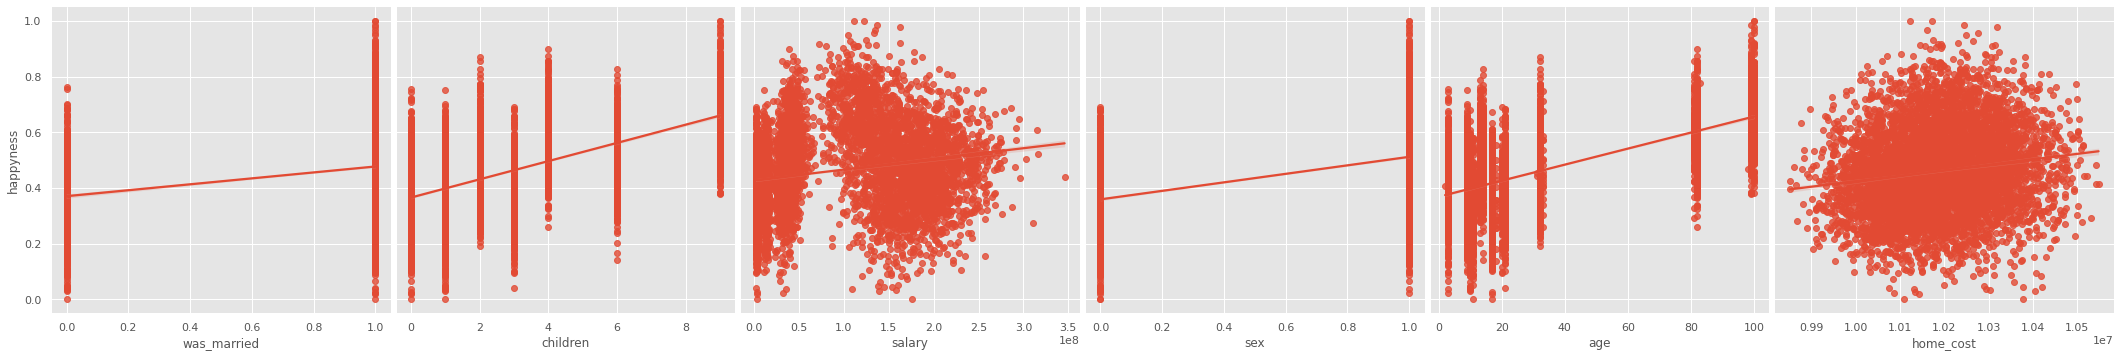

In [37]:
sns.pairplot(
    data, 
    y_vars='happyness', 
    x_vars=['was_married', 'children', 'salary', 'sex', 'age', 'home_cost'], 
    size=5,
    kind='reg',
    diag_kind=None
); 

Существует ли связь между уровнем счастья и зарплатой?

In [38]:
model = smf.ols('happyness ~ salary', data=data)
res = model.fit()
print(res.summary()) 

                            OLS Regression Results                            
Dep. Variable:              happyness   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     249.3
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           4.71e-55
Time:                        19:19:11   Log-Likelihood:                 2839.6
No. Observations:                5990   AIC:                            -5675.
Df Residuals:                    5988   BIC:                            -5662.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4279      0.003    151.120      0.0

In [39]:
res.params

Intercept    4.278864e-01
salary       3.830754e-10
dtype: float64

- Получившееся уравнение линейной регрессии

$$
Happyness_i = 0.428 + 3.83e^-10 \cdot salary_i
$$

Это уравнение показывает, как зависит счастье от зарплаты

Насколько сильны эти отношения?

Видно, что зависимость получается с совершенно небольшим коэффициентом, таким образом, можно сказать, что счастье почти не зависит от зарплаты

Как факт брака способствуют стоимости недвижимости?

In [40]:
model = smf.ols('was_married ~ home_cost', data=data)
res = model.fit()
print(res.summary()) 

                            OLS Regression Results                            
Dep. Variable:            was_married   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     790.4
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.83e-163
Time:                        19:21:17   Log-Likelihood:                -2090.8
No. Observations:                5990   AIC:                             4186.
Df Residuals:                    5988   BIC:                             4199.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.5642      0.381     30.319      0.0

In [41]:
res.params

Intercept    11.564204
home_cost    -0.000001
dtype: float64

- Получившееся уравнение 

$$
HomeCost_i = 11.564 - 0.000001 \cdot WasMarried_i
$$

Это уравнение показывает зависимость стоимости дома от наличия брака

Видим обратно-пропорциональную зависимость

Зная влияние каждого фактора, можем ли мы предсказать уровень счастья?

Используем множественную регрессию

In [42]:
model = smf.ols('happyness ~ children + salary + age + home_cost', data=data)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              happyness   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     1113.
Date:                Tue, 14 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:22:46   Log-Likelihood:                 4382.9
No. Observations:                5990   AIC:                            -8756.
Df Residuals:                    5985   BIC:                            -8722.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2269      0.177      1.283      0.2

По данным коэффициентам мы можем построить уравнение регрессии, по которому сможем определить уровень счастья человека, так что ответ да

Какие признаки не влияют на уровень счастья? (стат. значимость)

Из таблицы видно, что на уровень счастья не влияют такие факторы, как зар.плата и стоимость дома (коэффициенты равны 1.026e-10 и 1.186e-08 соответственно)

Какой признак самый сильный?

Самым сильным признаком среди предложенных является количество детей в семье (коэффициент линейной регрессии равен 0.0161)

Постройте график остатков. Всю ли информацию смогла извлечь ваша модель из данных?

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


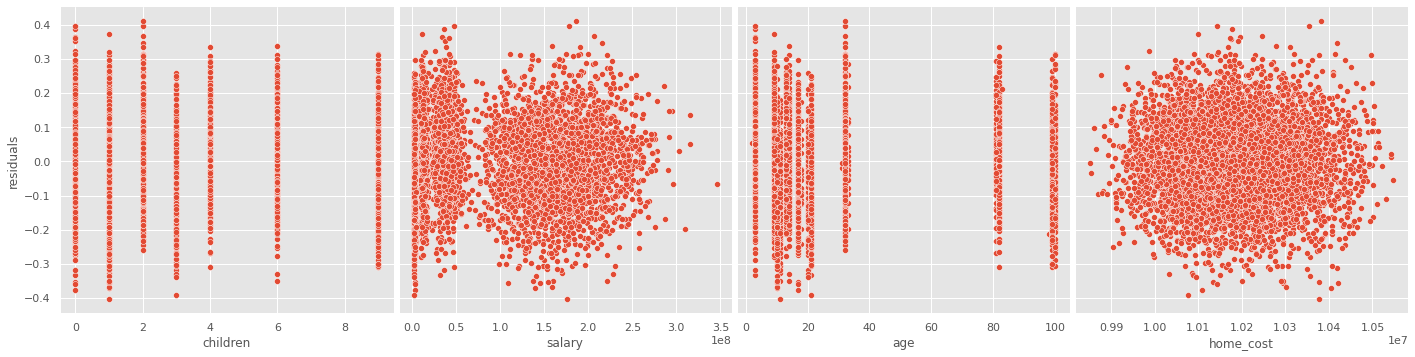

In [43]:
data['residuals'] = res.resid

sns.pairplot(
    data, 
    y_vars='residuals', 
    x_vars=['children', 'salary', 'age', 'home_cost'], 
    size=5,
    diag_kind=None
);

Проверим то, нет ли скореллированных признаков в датафрейме

In [44]:
data[['children', 'salary', 'age', 'home_cost']].corr()

children    salary       age  home_cost
children   1.000000  0.375466  0.743033   0.286517
salary     0.375466  1.000000  0.072881   0.686198
age        0.743033  0.072881  1.000000   0.052204
home_cost  0.286517  0.686198  0.052204   1.000000

Видно, что у построенной модели есть скореллированные признаки, такие как, стоимость дома и зар.плата, а также количество детей и возраст

Уберем по одному из этих признаков для новой оценки нашей модели


In [45]:
model = smf.ols('happyness ~ children + salary', data=data)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              happyness   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     1745.
Date:                Tue, 14 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:26:47   Log-Likelihood:                 4092.9
No. Observations:                5990   AIC:                            -8180.
Df Residuals:                    5987   BIC:                            -8160.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3693      0.003    146.210      0.0

Построем для нее график остатков

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


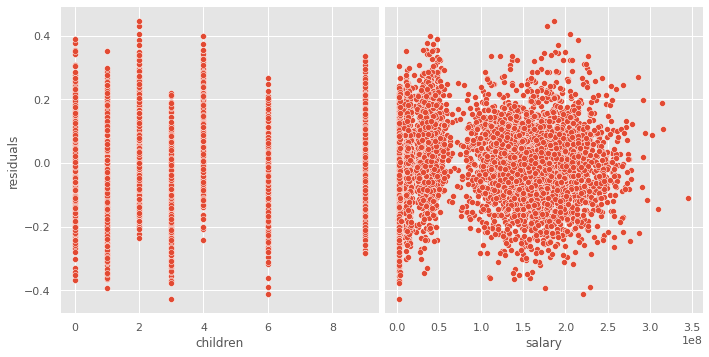

In [46]:
data['residuals'] = res.resid

sns.pairplot(
    data, 
    y_vars='residuals', 
    x_vars=['children', 'salary'], 
    size=5,
    diag_kind=None
);

Наблюдается ли гетероскедастичность в остатках?

In [47]:
from statsmodels.stats.diagnostic import het_breuschpagan

_, _, _, p_value = het_breuschpagan(res.resid, data[['children', 'salary']].values)
print(p_value)

4.3586789514078656e-290


Видим, что p_value сильно ниже уровня значимости. Гипотеза о гомоскедастичности отвергается.

Есть ли в данных автокоррелированность?

Для проверки этой предпосылки нам достаточно посмотреть в протокол оценивания и посмотреть на Durbin-Watson. В нашем примере он равен 2.035, следовательно, автокоррелированности в остатках нет.

# Дополнительные баллы (+10 баллов)
* Аккуратный и понятный код **+5 баллов**
* Присутствуют лаконичные и понятные комментарии **+5 балов**